In [ ]:
!pip install nltk
!pip install spacy
!pip install seaborn
!pip install matplotlib
!pip install textblob

In [ ]:
import pandas as pd
import re
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from matplotlib.pyplot import figure
figure(figsize=(80, 60), dpi=80)
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
to_update = {'—', '&', 'I', 'p', 'hn', 'el', 'de'}
stopwords.update(to_update) 

In [ ]:
biden = pd.read_csv('ProjektZal/JoeBidenTweets.csv')
trump = pd.read_csv('ProjektZal/trump_insult_tweets_2014_to_2021.csv')

In [ ]:
start_date = "2019-1-1"
end_date = "2021-1-31"
after_start_date = biden["timestamp"] >= start_date
before_end_date = biden["timestamp"] <= end_date
between_two_dates = after_start_date & before_end_date
biden_dates = biden.loc[between_two_dates]

after_start_date = trump["date"] >= start_date
before_end_date = trump["date"] <= end_date
between_two_dates = after_start_date & before_end_date
trump_dates = trump.loc[between_two_dates]

In [ ]:
biden_dates.shape

In [ ]:
trump_dates.shape

In [ ]:
biden_data = biden_dates['tweet']
trump_data = trump_dates['tweet']

In [ ]:
biden_data.head()

In [ ]:
trump_data.head()

In [ ]:
biden_data = biden_data.drop_duplicates()
biden_data.shape

In [ ]:
trump_data = trump_data.drop_duplicates()
trump_data.shape

In [ ]:
def clean_text(list_of_words):
    temp = re.sub("\s{2,}", " ", list_of_words)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = re.sub("–", "", temp)
    temp = temp.strip()
    return temp

biden_data = [clean_text(i) for i in biden_data]
trump_data = [clean_text(i) for i in trump_data]
print(trump_data)

In [ ]:
#Function to remove emojis, symbols, pictographs, map symbols and flags from iOS
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

biden_data = [remove_emoji(i) for i in biden_data]
trump_data = [remove_emoji(i) for i in trump_data]

In [ ]:
#Function to split tweets into words
biden_all_sentences = []
trump_all_sentences = []
def split_df(df, list_of_words):
    for line in df:
        for word in line.split():
            list_of_words.append(word)

split_df(biden_data, biden_all_sentences)
split_df(trump_data, trump_all_sentences)
print(biden_all_sentences)

In [ ]:
len(biden_all_sentences)

In [ ]:
len(trump_all_sentences)

In [ ]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

biden_stem = []
for word in biden_all_sentences:
    biden_stem.append(s_stemmer.stem(word))

trump_stem = []
for word in trump_all_sentences:
    trump_stem.append(s_stemmer.stem(word))



In [ ]:
#Removing all Stop Words
biden_stopwords = []
trump_stopwords = []

for word in biden_stem:
    if word not in stopwords:
        biden_stopwords.append(word)
        
for word in trump_stem:
    if word not in stopwords:
        trump_stopwords.append(word)


In [ ]:
len(biden_stopwords)

In [ ]:
len(trump_stopwords)

In [ ]:
print(biden_stopwords)

In [ ]:
df_biden = pd.DataFrame(biden_stopwords)
df_trump = pd.DataFrame(trump_stopwords)

df_biden_matrix = df_biden.copy()
df_trump_matrix = df_trump.copy()

df_biden = df_biden[0].value_counts()
df_trump = df_trump[0].value_counts()

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_biden

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


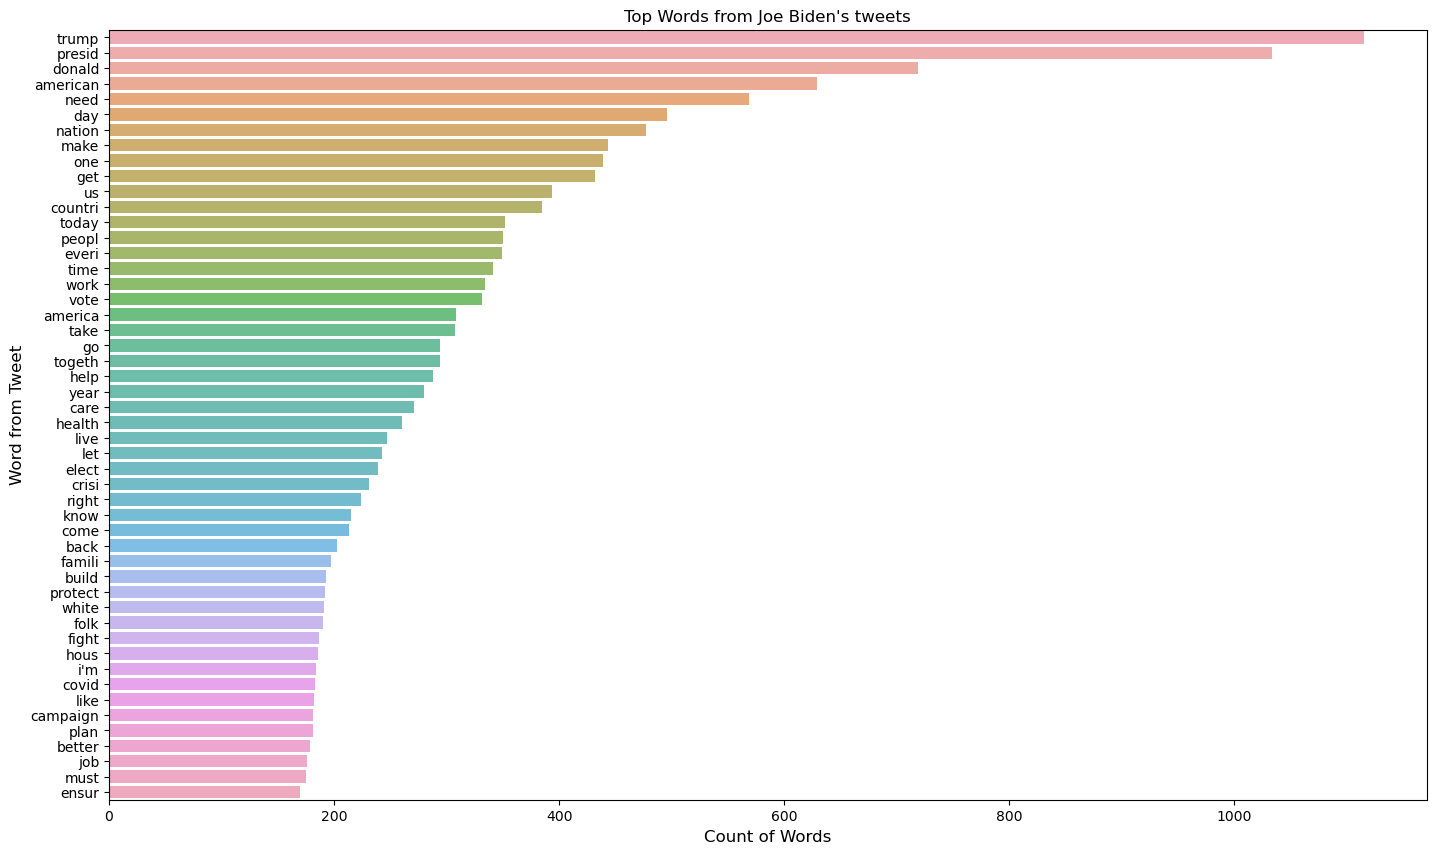

In [ ]:
df_biden_original = df_biden.copy()
df_biden = df_biden[:50,]
plt.figure(figsize=(17,10))
sns.barplot(df_biden.values, df_biden.index, alpha=0.8)
plt.title("Top Words from Joe Biden's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


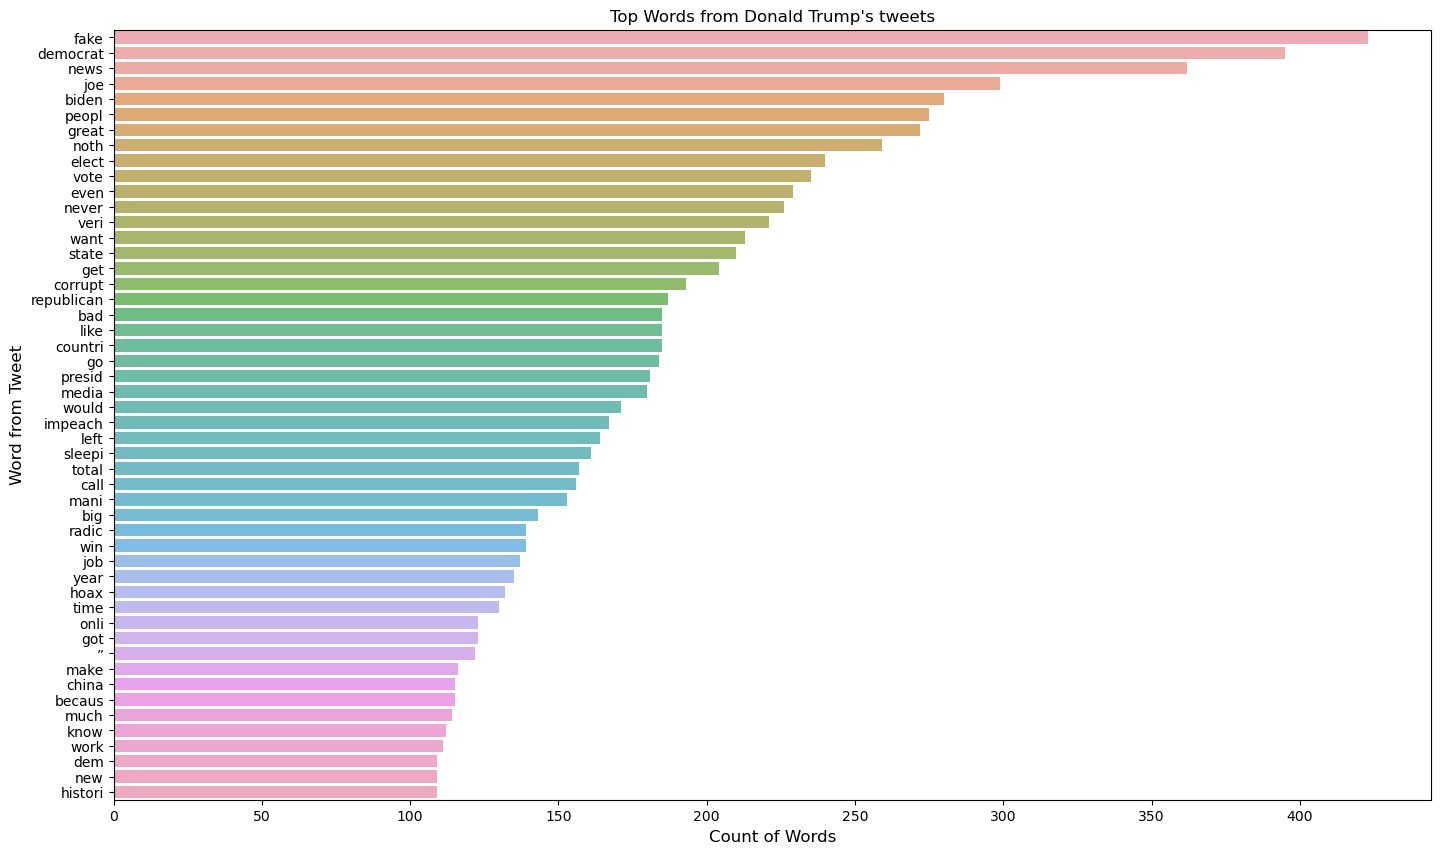

In [ ]:
df_trump_original = df_trump.copy()
df_trump = df_trump[:50,]
plt.figure(figsize=(17,10))
sns.barplot(df_trump.values, df_trump.index, alpha=0.8)
plt.title("Top Words from Donald Trump's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
#tabA_bez_tabB = [el for el in tabA if el not in tabB]

In [ ]:
df_biden_original = df_biden_original.to_frame()
df_trump_original = df_trump_original.to_frame()

In [ ]:
df_biden_original

In [ ]:
df_biden_original = df_biden_original.reset_index()
df_biden_original.rename(columns={0: 'count', 'index':'words'}, inplace=True)

df_trump_original = df_trump_original.reset_index()
df_trump_original.rename(columns={0: 'count', 'index':'words'}, inplace=True)

In [ ]:
same_words = df_biden_original.merge(df_trump_original, on='words', how='inner')


In [ ]:
same_words['sum'] = same_words['count_x'] + same_words['count_y']
same_words = same_words.sort_values(by=['sum'], ascending=False)

In [ ]:
same_words.head(50)

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


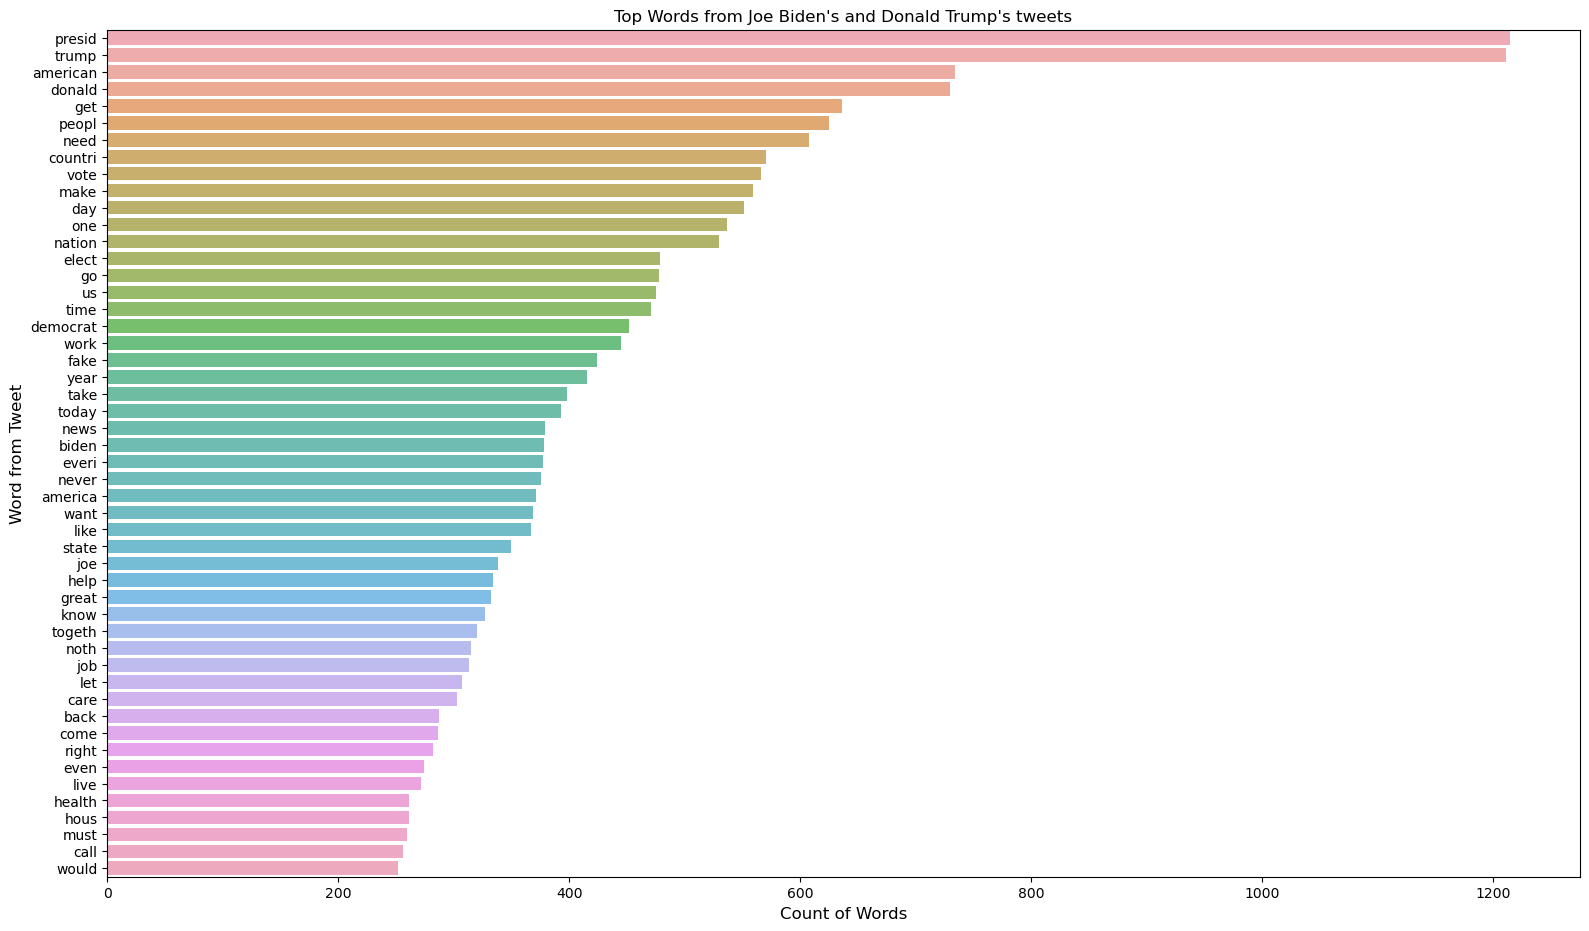

In [ ]:
same_words = same_words.head(50)
plt.figure(figsize=(19,11))
sns.barplot(same_words['sum'], same_words['words'], alpha=0.8)
plt.title("Top Words from Joe Biden's and Donald Trump's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
df=pd.merge(df_biden_original,df_trump_original,on='words',how="outer",indicator=True)

In [ ]:
df_biden_only=df[df['_merge']=='left_only']

In [ ]:
df_biden_only

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


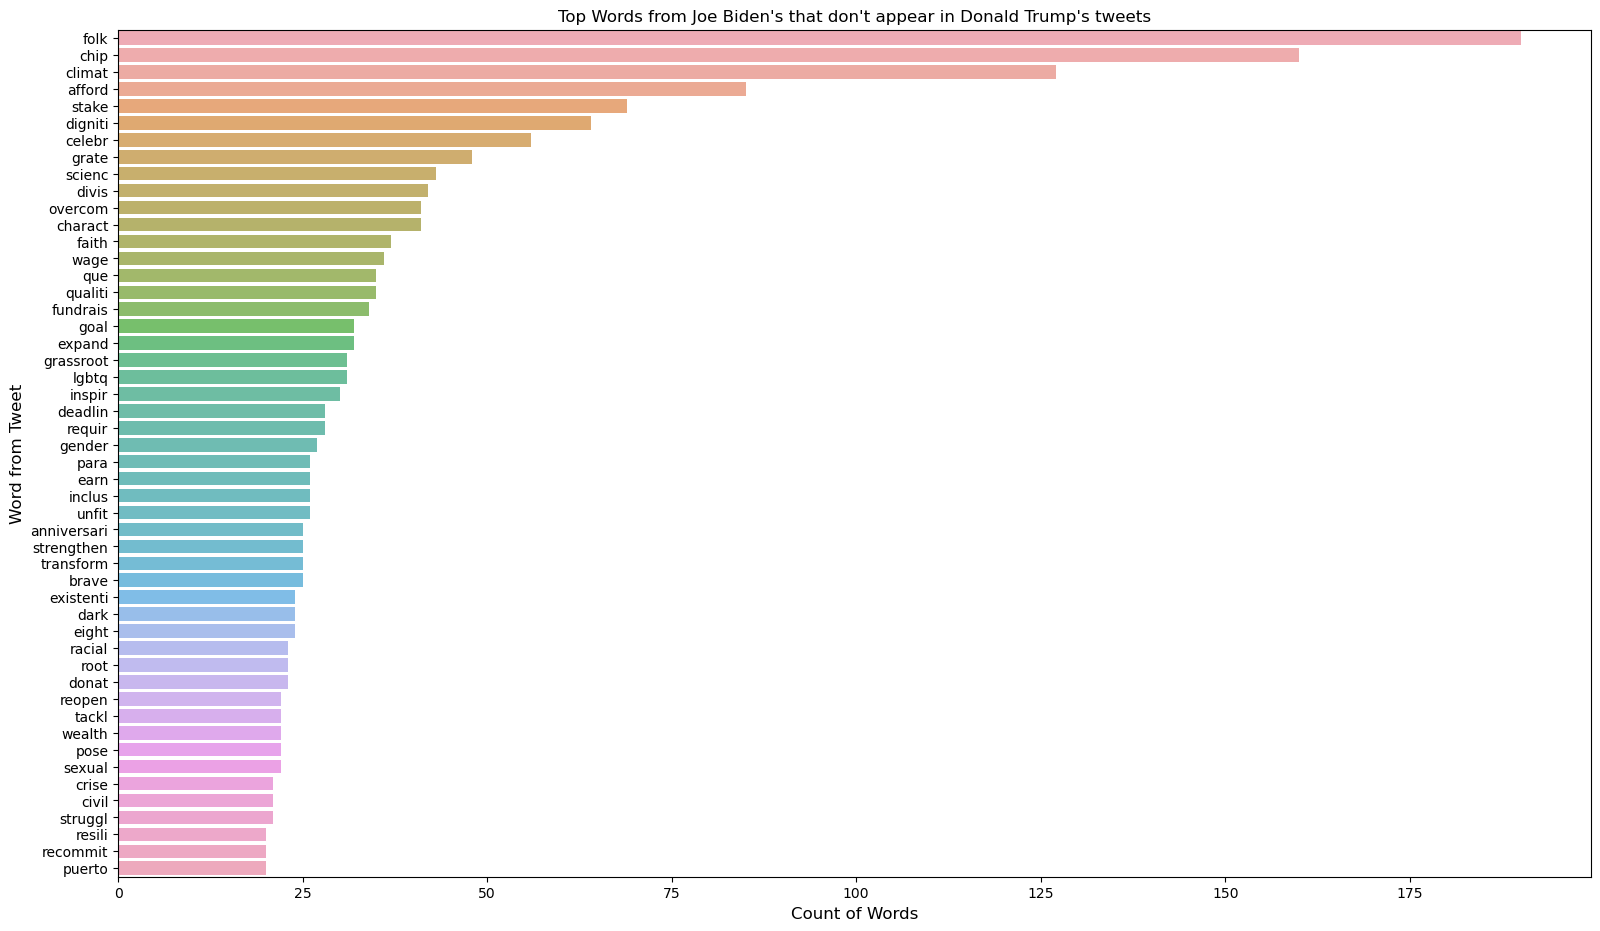

In [ ]:
df_biden_only = df_biden_only.head(50)
plt.figure(figsize=(19,11))
sns.barplot(df_biden_only['count_x'], df_biden_only['words'], alpha=0.8)
plt.title("Top Words from Joe Biden's that don't appear in Donald Trump's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
df=pd.merge(df_trump_original,df_biden_original,on='words',how="outer",indicator=True)
df_trump_only=df[df['_merge']=='left_only']

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


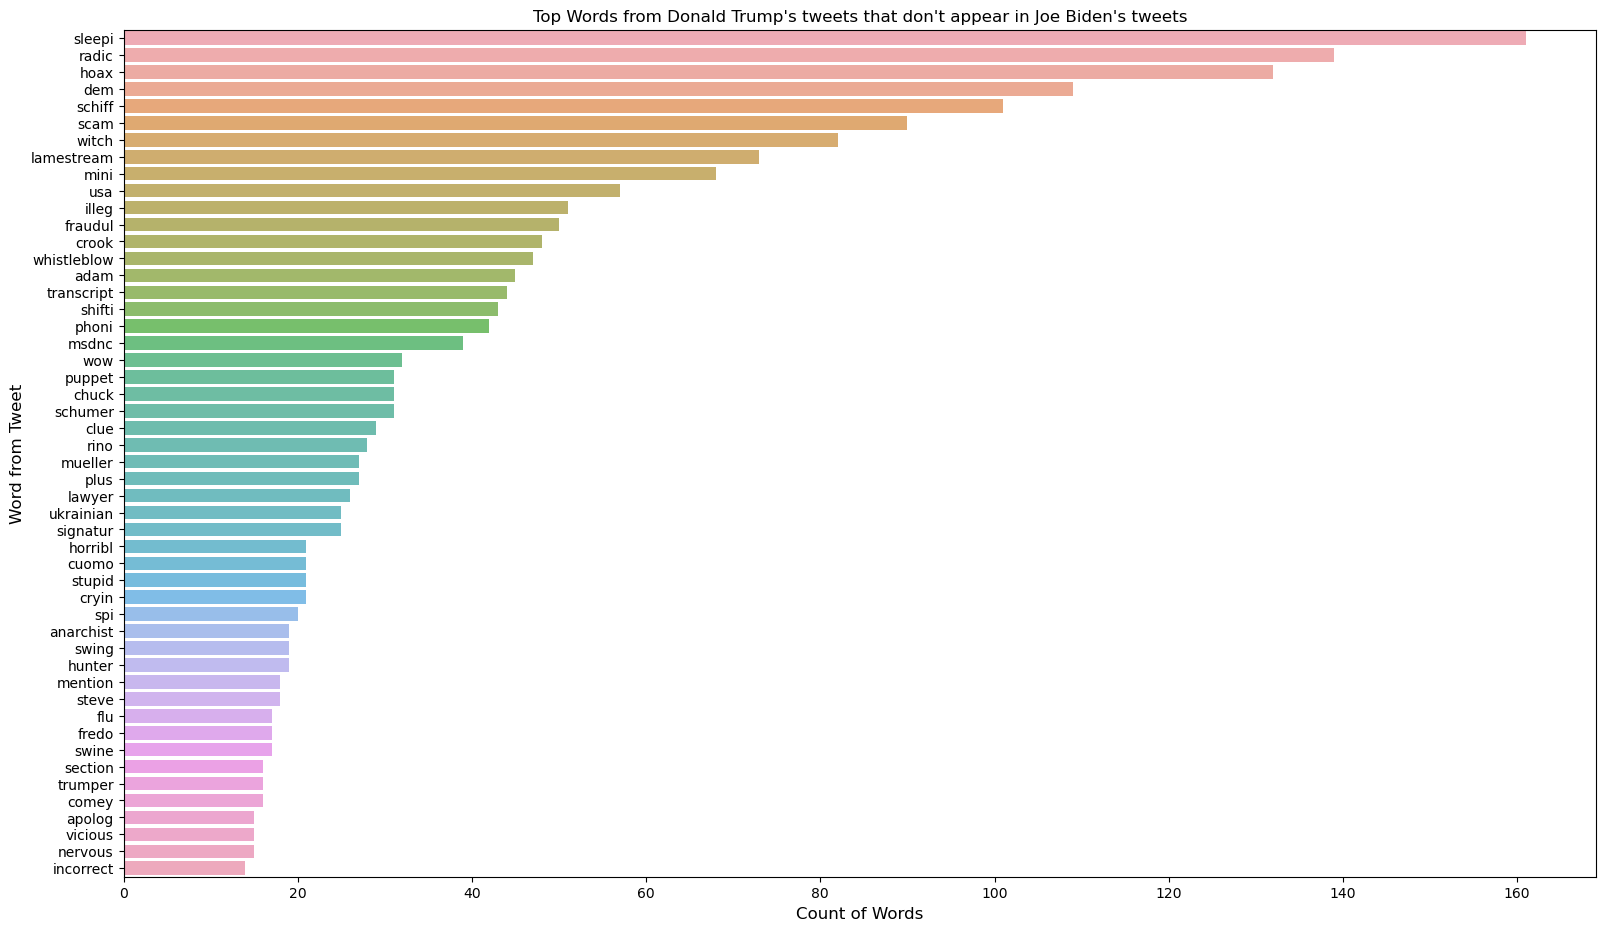

In [ ]:
df_trump_only = df_trump_only.head(50)
plt.figure(figsize=(19,11))
sns.barplot(df_trump_only['count_x'], df_trump_only['words'], alpha=0.8)
plt.title("Top Words from Donald Trump's tweets that don't appear in Joe Biden's tweets")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
#Sentiment analysis 

from textblob import TextBlob
biden_data[0]
trump_data[0]

In [ ]:
biden_data_df = pd.DataFrame(biden_data)
trump_data_df = pd.DataFrame(trump_data)

In [ ]:
biden_data_df

Text(0.5, 1.0, "Biden's tweets sentimental analysis")

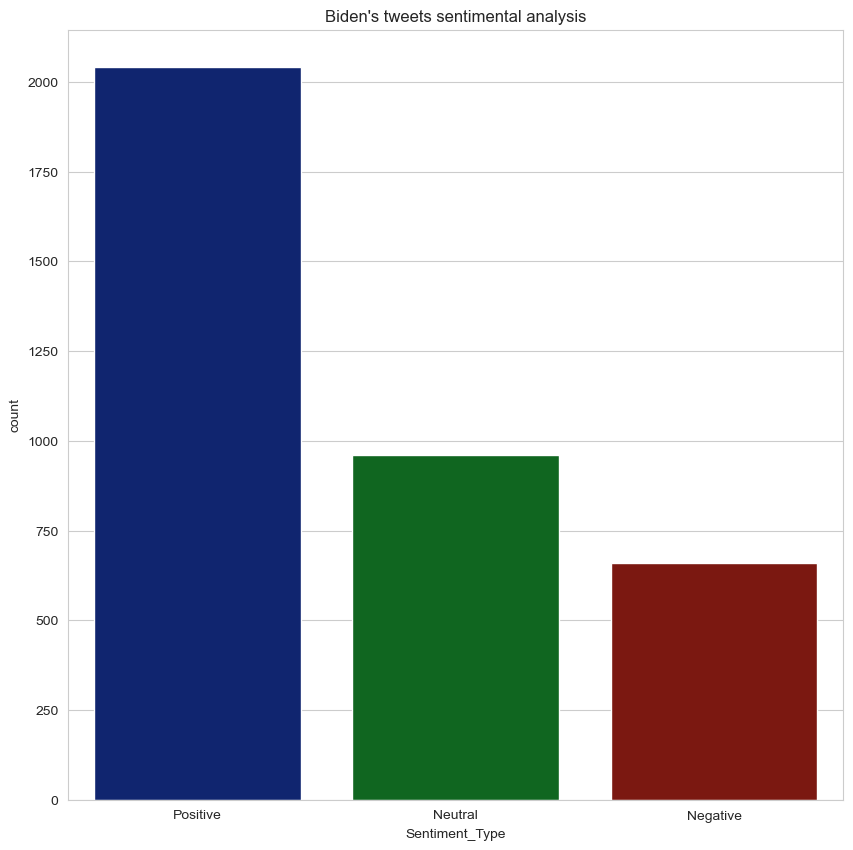

In [ ]:
bloblist_desc = list()

df_usa_descr_str=biden_data_df[0]
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
plt.style.use('seaborn-dark-palette')
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)
ax.set_title("Biden's tweets sentimental analysis")

Text(0.5, 1.0, "Trump's tweets sentimental analysis")

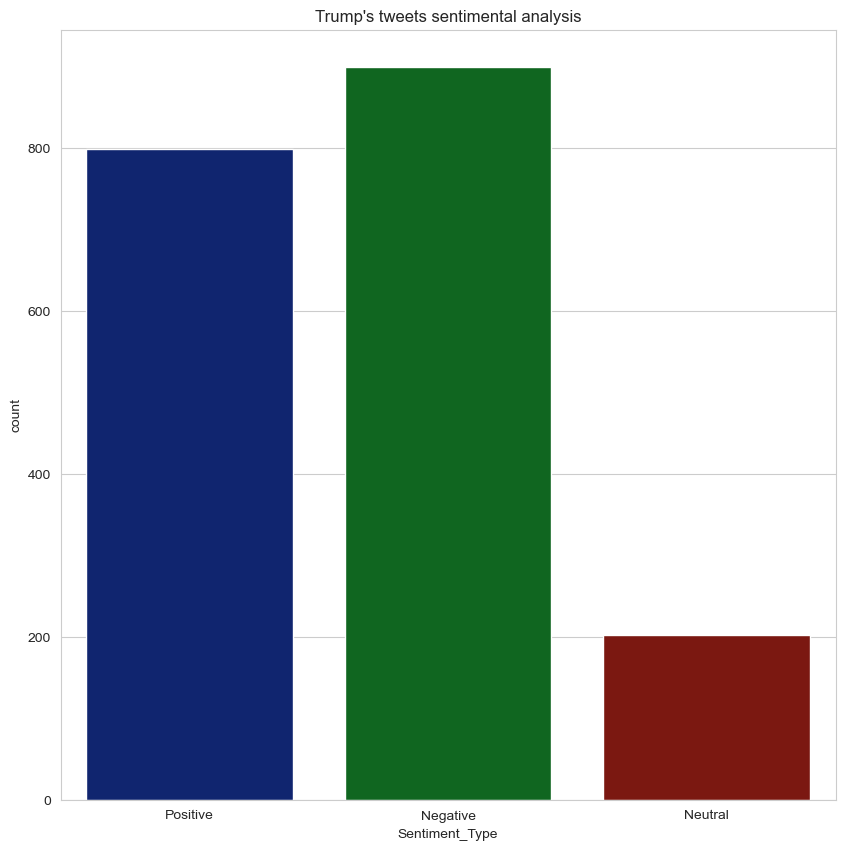

In [ ]:
bloblist_desc = list()

df_usa_descr_str=trump_data_df[0]
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
plt.style.use('seaborn-dark-palette')
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)
ax.set_title("Trump's tweets sentimental analysis")